In [1]:
## Install Necessary Library
# !pip install geopandas

### Reading data
The first step is to read in some geospatial data! To do this, we'll use the GeoPandas library.

In [2]:
import geopandas as gpd

There are many different geospatial file formats, such as:
- shapefile
- GeoJSON
- KML
- GPKG 

All of these file types can be quickly loaded with the gpd.read_file() function.

In [3]:
## Read in the data
full_data = gpd.read_file('geospatial-learn-course-data/DEC_lands/DEC_lands/DEC_lands.shp')

## View the first five rows of the data
full_data.head()

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,SHAPE_AREA,SHAPE_LEN,geometry
0,1,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,738.620192,103,N,2.990365e+06,7927.662385,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,2,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,282.553140,1218,N,1.143940e+06,4776.375600,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,3,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,234.291262,1780,N,9.485476e+05,5783.070364,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,4,FOR PRES DET PAR,CFP,GREENE COUNTY FP DETACHED PARCEL,WILD FOREST,None,None,4,GREENE,http://www.dec.ny.gov/,GREENE RPP,5/12,STAMFORD,450.106464,2060,N,1.822293e+06,7021.644833,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,6,FOREST PRESERVE,AFP,SARANAC LAKES WILD FOREST,WILD FOREST,SARANAC LAKES,None,5,ESSEX,http://www.dec.ny.gov/lands/22593.html,"DECRP, ESSEX RPP",12/96,RAY BROOK,69.702387,1517,N,2.821959e+05,2663.909932,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


- As you can see in the "CLASS" column and the "ACRES" column, each of the first five rows corresponds to a different forest

### Prerequisites
To view the first five rows of the data, we used the head() method. You may recall that this is also what we use to preview a Pandas DataFrame. In fact, every command that you can use with a DataFrame will work with the data!

- This is because the data was loaded into a (GeoPandas) GeoDataFrame object that has all of the capabilities of a (Pandas) DataFrame.

In [4]:
type(full_data)

geopandas.geodataframe.GeoDataFrame

For instance, if we don't plan to use all of the columns, we can select a subset of them. 

In [5]:
data = full_data[["CLASS", "COUNTY", "geometry"]]     ### OR full_data.loc[:, ["CLASS", "COUNTY", "geometry"]]
data.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,WILD FOREST,ESSEX,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


We use the value_counts() method to see a list of different land types, along with how many times they appear in the dataset.

In [6]:
data.CLASS.value_counts()

WILD FOREST                   965
INTENSIVE USE                 108
PRIMITIVE                      60
WILDERNESS                     52
ADMINISTRATIVE                 17
UNCLASSIFIED                    7
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: CLASS, dtype: int64

In [7]:
# Select lands that fall under the "WILD FOREST" or "WILDERNESS" category
wild_lands = data.loc[data.CLASS.isin(['WILD FOREST', 'WILDERNESS'])]
wild_lands.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,WILD FOREST,ESSEX,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


### Create the First Map
We can quickly visualize the data with the plot() method.

<AxesSubplot:>

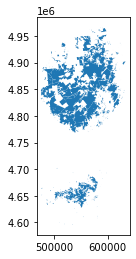

In [8]:
wild_lands.plot()

- Every GeoDataFrame contains a special "geometry" column. It contains all of the geometric objects that are displayed when we call the plot() method.

In [9]:
# View the first five entries in the "geometry" column
wild_lands['geometry'].head()

0    POLYGON ((486093.245 4635308.586, 486787.235 4...
1    POLYGON ((491931.514 4637416.256, 491305.424 4...
2    POLYGON ((486000.287 4635834.453, 485007.550 4...
3    POLYGON ((541716.775 4675243.268, 541217.579 4...
4    POLYGON ((583896.043 4909643.187, 583891.200 4...
Name: geometry, dtype: geometry

In [10]:
wild_lands['geometry'].nunique()

1016

We create three more GeoDataFrames, containing campsite locations (Point), foot trails (LineString), and county boundaries (Polygon).

### Campsites in New York state (Point)

In [12]:
POI_data = gpd.read_file("geospatial-learn-course-data/DEC_pointsinterest/DEC_pointsinterest/Decptsofinterest.shp")
POI_data.head()

,OBJECTID,UNIT,FACILITY,NAME,ASSET,DESCRIP,REGION,OFFICE,UPDATED,ASSET_UID,ACCESSIBLE,geometry
0,91706,CFP,DELAWARE WILD FOREST,ADA PRIMITIVE CAMPSITE,PRIMITIVE CAMPSITE,None,4,STAMFORD,2016-09-26,16519,N,POINT (505138.696 4649388.247)
1,108646,SCHUYLER 02,SUGAR HILL STATE FOREST,MAPLE LANE CAMPSITE #3,PRIMITIVE CAMPSITE,None,8,BATH,2018-02-23,18124,N,POINT (333481.874 4692737.800)
2,19933,AFP,MOOSE RIVER PLAINS WILD FOREST,MOOSE RIVER PLAINS CAMPSITE 103,PRIMITIVE CAMPSITE,LIVE,5,NORTHVILLE,2010-06-16,1018,N,POINT (525210.784 4833837.295)
3,3945,ALLEGANY 12,LOST NATION STATE FOREST,NEWLAND FR PARKING,UNPAVED PARKING LOT,-99,9,WEST ALMOND,None,8623,N,POINT (231909.125 4712818.500)
4,1037,CATTARAUGUS 08,ROCK CITY STATE FOREST,LRC PICNIC PAVILION #1,PICNIC PAVILION,None,9,ALLEGANY,None,14561,N,POINT (193656.734 4679632.500)


In [13]:
campsites = POI_data.loc[POI_data.ASSET == 'PRIMITIVE CAMPSITE']
campsites.head()

,OBJECTID,UNIT,FACILITY,NAME,ASSET,DESCRIP,REGION,OFFICE,UPDATED,ASSET_UID,ACCESSIBLE,geometry
0,91706,CFP,DELAWARE WILD FOREST,ADA PRIMITIVE CAMPSITE,PRIMITIVE CAMPSITE,None,4,STAMFORD,2016-09-26,16519,N,POINT (505138.696 4649388.247)
1,108646,SCHUYLER 02,SUGAR HILL STATE FOREST,MAPLE LANE CAMPSITE #3,PRIMITIVE CAMPSITE,None,8,BATH,2018-02-23,18124,N,POINT (333481.874 4692737.800)
2,19933,AFP,MOOSE RIVER PLAINS WILD FOREST,MOOSE RIVER PLAINS CAMPSITE 103,PRIMITIVE CAMPSITE,LIVE,5,NORTHVILLE,2010-06-16,1018,N,POINT (525210.784 4833837.295)
5,39673,AFP,SARANAC LAKES WILD FOREST,SARANAC ISLANDS CAMPGROUND SITE 27,PRIMITIVE CAMPSITE,None,5,RAY BROOK,2012-01-09,5337,N,POINT (562996.482 4904871.885)
6,19434,AFP,LAKE GEORGE WILD FOREST,GAY POND ROAD CAMPSITE 13,PRIMITIVE CAMPSITE,DESIGNATED CAMPSITE WITH ACCESSIBLE PRIVY AND ...,5,WARRENSBURG,2010-05-24,3030,Y,POINT (591292.402 4807432.222)


### Foot trails in New York state (LineString)

In [14]:
roads_trails = gpd.read_file("geospatial-learn-course-data/DEC_roadstrails/DEC_roadstrails/Decroadstrails.shp")
trails = roads_trails.loc[roads_trails.ASSET == 'FOOT TRAIL']
trails.head()

,OBJECTID,UNIT,FACILITY,NAME,ASSET,ATV,FOOT,HORSE,BIKE,XC,...,MAPPWD,DESCRIP,ROAD_CLASS,UPDATED,REGION,OFFICE,MARKER,TRANS_UID,SHAPE_LEN,geometry
31,304,AFP,DEBAR MOUNTAIN WILD FOREST,MAIN BRANCH CANOE CARRY,FOOT TRAIL,N,M,N,N,N,...,N,None,RT,2006-08-24,5,RAY BROOK,None,244.776100,246.427662,"LINESTRING (542463.277 4933622.421, 542429.239..."
34,311,AFP,DEBAR MOUNTAIN WILD FOREST,CAMP SITE ACCESS TRAIL,FOOT TRAIL,N,Y,N,N,N,...,N,None,RT,2011-04-19,5,RAY BROOK,None,163.203974,163.203974,"LINESTRING (564033.375 4922561.921, 564100.343..."
35,312,AFP,DEBAR MOUNTAIN WILD FOREST,ACCESS TRAIL,FOOT TRAIL,N,Y,N,N,N,...,N,None,RT,2011-04-19,5,RAY BROOK,None,117.720119,117.720119,"LINESTRING (564202.360 4922745.700, 564298.863..."
37,314,AFP,DEBAR MOUNTAIN WILD FOREST,EAST BRANCH CANOE CARRY,FOOT TRAIL,N,Y,N,N,Y,...,N,None,RT,2006-08-24,5,RAY BROOK,None,386.073522,386.073522,"LINESTRING (547547.421 4942827.828, 547629.172..."
38,317,AFP,DEBAR MOUNTAIN WILD FOREST,RAINBOW LAKE TO JONES POND CANOE CARRY,FOOT TRAIL,N,Y,N,N,Y,...,N,None,RT,2011-04-19,5,RAY BROOK,None,127.460965,127.460965,"LINESTRING (564759.838 4923577.416, 564654.630..."


### County boundaries in New York state (Polygon)

In [15]:
counties = gpd.read_file("geospatial-learn-course-data/NY_county_boundaries/NY_county_boundaries/NY_county_boundaries.shp")
counties.head()

,STATE,COUNTY,NAME,LSAD,LSAD_TRANS,OID_,COUNTY_FIP,POP2000,WHITE,BLACK,...,FHH_MINORC,FAMILIES,AV_FAM_SZ,HSE_UNITS,URBAN,RURAL,VACANT,OWNER_OCC,RENTER_OCC,geometry
0,36,089,St. Lawrence,06,County,44,089,111931,105782,2664,...,2773,26939,3,49721,16085,33636,9215,28606,11900,"POLYGON ((522686.116 4977770.435, 522785.820 4..."
1,36,019,Clinton,06,County,9,019,79894,74562,2863,...,1951,19261,3,33091,12161,20930,3668,20157,9266,"POLYGON ((576869.554 4981194.984, 576661.323 4..."
2,36,033,Franklin,06,County,16,033,51134,42970,3389,...,1312,11805,3,23936,7409,16527,6005,12638,5293,"POLYGON ((576869.554 4981194.984, 577209.259 4..."
3,36,031,Essex,06,County,15,031,38851,36848,1092,...,810,9832,3,23115,4288,18827,8087,11089,3939,"POLYGON ((622025.362 4932488.545, 621958.049 4..."
4,36,045,Jefferson,06,County,22,045,111738,99118,6517,...,2815,28142,3,54070,20947,33123,14002,23906,16162,"POLYGON ((431513.316 4917024.860, 433126.724 4..."


Next, we create a map from all four GeoDataFrames.

- The plot() method takes as (optional) input several parameters that can be used to customize the appearance. Most importantly, setting a value for ax ensures that all of the information is plotted on the same map.

<AxesSubplot:>

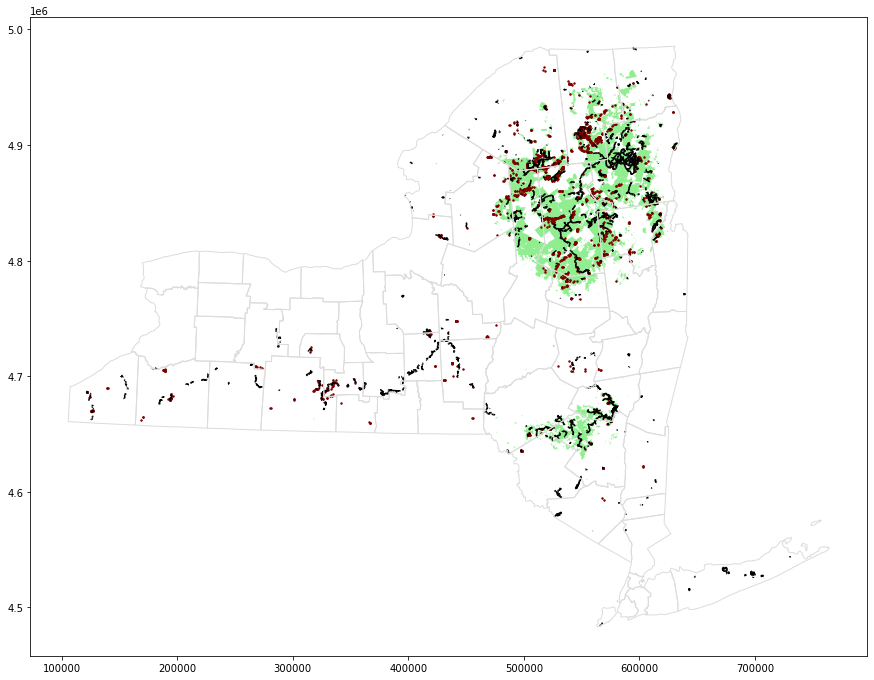

In [21]:
# Define a base map with county boundaries
ax = counties.plot(figsize=(15,15), color='none', edgecolor='gainsboro', zorder=3)

# Add wild lands, campsites, and foot trails to the base map
wild_lands.plot(color='lightgreen', ax=ax)
campsites.plot(color='maroon', markersize=2, ax=ax)
trails.plot(color='black', markersize=1, ax=ax)

#### It looks like the northeastern part of the state would be a great option for a camping trip!